In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import requests
import io

## **Dataset**

In [3]:
url = "https://raw.githubusercontent.com/bharathtej/UCI-CBM-Dataset/main/data.txt"
download = requests.get(url).content
result = pd.read_fwf(io.StringIO(download.decode('utf-8')))

In [4]:
result.columns = ['lp', 'v [knots]','GTT [kN m]','GTn [rpm]', 'GGn [rpm]', 'Ts [kN]', 'Tp [kN]', 'T48 [C]', 'T1 [C]', 'T2 [C]', 'P48 [bar]', 'P1 [bar]', 'P2 [bar]', 'Pexh [bar]', 'TIC [%]', 'mf [kg/s]', 'GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']

In [5]:
result.head(5)

,lp,v [knots],GTT [kN m],GTn [rpm],GGn [rpm],Ts [kN],Tp [kN],T48 [C],T1 [C],T2 [C],P48 [bar],P1 [bar],P2 [bar],Pexh [bar],TIC [%],mf [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
1,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
2,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
3,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
4,6.175,18.0,29792.731,2307.404,8828.360,246.278,246.278,800.434,288.0,676.397,2.501,0.998,13.356,1.030,35.760,0.708,0.95,0.975


In [6]:
result.describe()

,lp,v [knots],GTT [kN m],GTn [rpm],GGn [rpm],Ts [kN],Tp [kN],T48 [C],T1 [C],T2 [C],P48 [bar],P1 [bar],P2 [bar],Pexh [bar],TIC [%],mf [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.0,11933.000000,11933.000000,1.193300e+04,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,5.167004,15.001006,27249.757760,2136.355191,8201.074989,227.354184,227.354184,735.518197,288.0,646.223347,2.353068,9.980000e-01,12.297655,1.029475,33.643482,0.662488,0.975002,0.987501
std,2.626239,7.745837,22148.166255,774.082804,1091.272098,200.494197,200.494197,173.670045,0.0,72.673651,1.084754,2.533635e-13,5.337355,0.010390,25.841307,0.507125,0.014719,0.007500
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.886000,1386.758000,7058.402000,60.317000,60.317000,589.875000,288.0,578.102000,1.389000,9.980000e-01,7.448000,1.020000,13.700000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.666000,1924.326000,8482.088000,175.268000,175.268000,706.048000,288.0,637.142000,2.083000,9.980000e-01,11.092000,1.026000,25.277000,0.496000,0.975000,0.988000
75%,7.148000,21.000000,39001.427000,2678.079000,9132.610000,332.365000,332.365000,834.091000,288.0,693.928000,2.981000,9.980000e-01,15.658000,1.036000,44.553000,0.882000,0.988000,0.994000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


In [7]:
type(result)

pandas.core.frame.DataFrame

In [8]:
result.isnull().sum()

lp                                       0
v [knots]                                0
GTT [kN m]                               0
GTn [rpm]                                0
GGn [rpm]                                0
Ts [kN]                                  0
Tp [kN]                                  0
T48 [C]                                  0
T1 [C]                                   0
T2 [C]                                   0
P48 [bar]                                0
P1 [bar]                                 0
P2 [bar]                                 0
Pexh [bar]                               0
TIC [%]                                  0
mf [kg/s]                                0
GT Compressor decay state coefficient    0
GT Turbine decay state coefficient       0
dtype: int64

## **Graphical Representation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


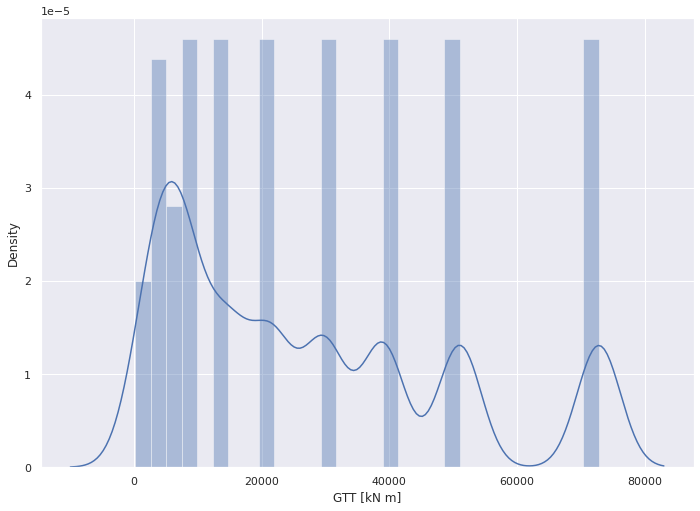

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(result['GTT [kN m]'], bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


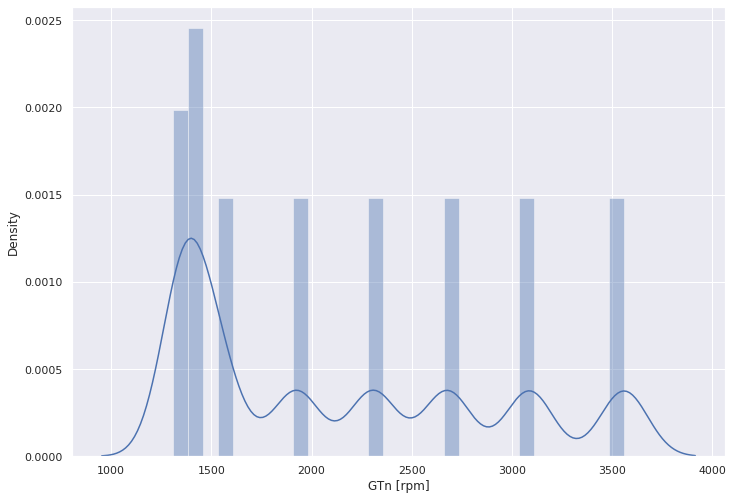

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(result['GTn [rpm]'], bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


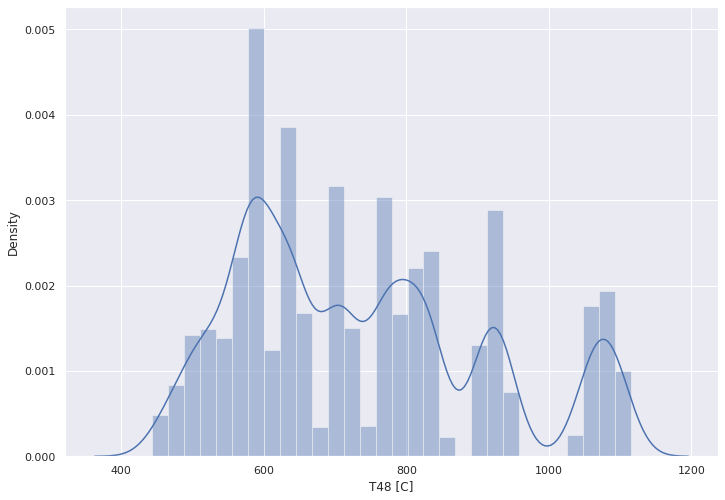

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(result['T48 [C]'], bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


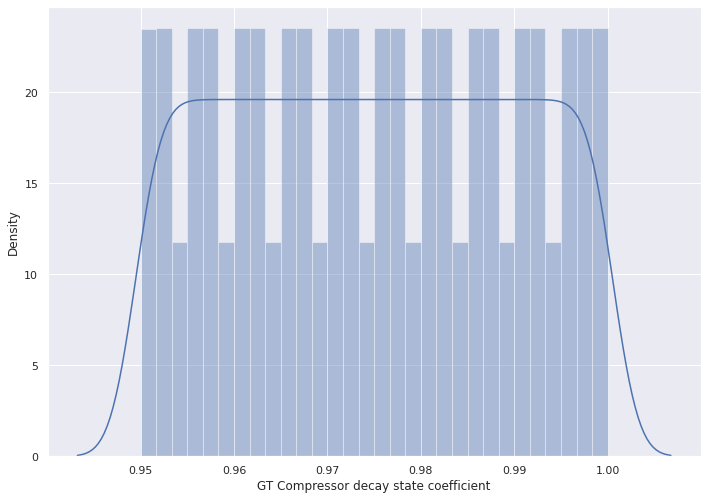

In [12]:
sns.distplot(result['GT Compressor decay state coefficient'], bins = 30)
plt.show()

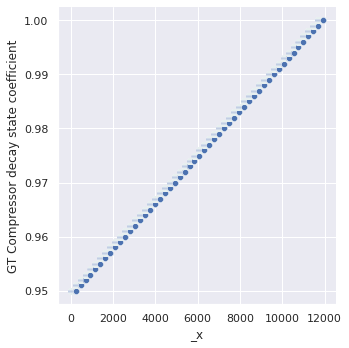

In [13]:
sns.relplot(data=result, x=result.index, y='GT Compressor decay state coefficient')
plt.show()

In [14]:
result.drop(['T1 [C]', 'P1 [bar]'], axis=1, inplace =True)

In [15]:
correlation_matrix = result.corr().round(2)

In [16]:
correlation_matrix


,lp,v [knots],GTT [kN m],GTn [rpm],GGn [rpm],Ts [kN],Tp [kN],T48 [C],T2 [C],P48 [bar],P2 [bar],Pexh [bar],TIC [%],mf [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
lp,1.00,1.00,0.96,0.96,0.99,0.96,0.96,0.96,0.98,0.96,0.97,0.95,0.91,0.93,-0.00,-0.00
v [knots],1.00,1.00,0.96,0.96,0.99,0.96,0.96,0.96,0.98,0.96,0.97,0.95,0.91,0.93,-0.00,-0.00
GTT [kN m],0.96,0.96,1.00,0.99,0.93,1.00,1.00,0.99,0.99,1.00,1.00,1.00,0.98,1.00,0.00,0.00
GTn [rpm],0.96,0.96,0.99,1.00,0.94,0.99,0.99,0.98,0.99,1.00,1.00,0.99,0.96,0.98,0.00,-0.00
GGn [rpm],0.99,0.99,0.93,0.94,1.00,0.93,0.93,0.94,0.97,0.94,0.95,0.92,0.88,0.90,-0.02,0.01
Ts [kN],0.96,0.96,1.00,0.99,0.93,1.00,1.00,0.99,0.99,1.00,1.00,1.00,0.98,0.99,0.00,-0.00
Tp [kN],0.96,0.96,1.00,0.99,0.93,1.00,1.00,0.99,0.99,1.00,1.00,1.00,0.98,0.99,0.00,-0.00
T48 [C],0.96,0.96,0.99,0.98,0.94,0.99,0.99,1.00,0.99,0.99,0.99,0.98,0.97,0.99,-0.04,-0.04
T2 [C],0.98,0.98,0.99,0.99,0.97,0.99,0.99,0.99,1.00,0.99,0.99,0.98,0.96,0.98,-0.05,-0.02
P48 [bar],0.96,0.96,1.00,1.00,0.94,1.00,1.00,0.99,0.99,1.00,1.00,1.00,0.98,0.99,0.01,-0.00


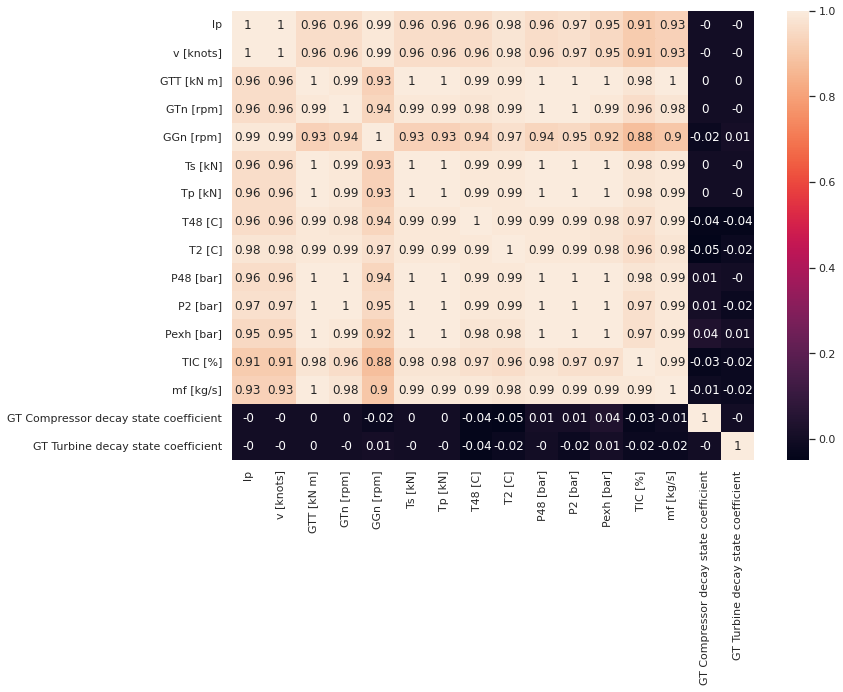

In [17]:
sns.heatmap(data=correlation_matrix, annot=True)

#**Scaling attributes such that it has mean of 0 and standard deviation of 1**

In [18]:
X = result[["lp", "v [knots]", "GTT [kN m]", "GTn [rpm]", "GGn [rpm]","Ts [kN]", "Tp [kN]", "T48 [C]", "T2 [C]", "P48 [bar]", "P2 [bar]","TIC [%]"]]
Y = result['GT Compressor decay state coefficient']

In [19]:
result['GTT [kN m]'] = (result['GTT [kN m]']-result['GTT [kN m]'].mean())/result['GTT [kN m]'].std()

In [20]:
result['GTn [rpm]'] = (result['GTn [rpm]']-result['GTn [rpm]'].mean())/result['GTn [rpm]'].std()

In [21]:
result['GGn [rpm]'] = (result['GGn [rpm]']-result['GGn [rpm]'].mean())/result['GGn [rpm]'].std()

In [22]:
result['Ts [kN]'] = (result['Ts [kN]']-result['Ts [kN]'].mean())/result['Ts [kN]'].std()

In [23]:
result['Tp [kN]'] = (result['Tp [kN]']-result['Tp [kN]'].mean())/result['Tp [kN]'].std()

In [24]:
result['T48 [C]'] = (result['T48 [C]']-result['T48 [C]'].mean())/result['T48 [C]'].std()

In [25]:
result['TIC [%]'] = (result['TIC [%]']-result['TIC [%]'].mean())/result['TIC [%]'].std()

In [26]:
result['T2 [C]'] = (result['T2 [C]']-result['T2 [C]'].mean())/result['T2 [C]'].std()

In [27]:
result['P48 [bar]'] = (result['P48 [bar]']-result['P48 [bar]'].mean())/result['P48 [bar]'].std()

In [28]:
result['P2 [bar]'] = (result['P2 [bar]']-result['P2 [bar]'].mean())/result['P2 [bar]'].std()

In [29]:
result.head(15)

,lp,v [knots],GTT [kN m],GTn [rpm],GGn [rpm],Ts [kN],Tp [kN],T48 [C],T2 [C],P48 [bar],P2 [bar],Pexh [bar],TIC [%],mf [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,2.088,6.0,-0.916084,-0.982052,-1.257804,-0.993296,-0.993296,-0.576479,-0.888429,-0.942212,-0.939727,1.019,-0.889602,0.287,0.95,0.975
1,3.144,9.0,-0.852013,-0.968370,-0.998160,-0.832923,-0.832923,-0.745760,-0.806845,-0.888743,-0.885018,1.020,-0.795528,0.259,0.95,0.975
2,4.161,12.0,-0.565526,-0.760759,-0.374283,-0.566501,-0.566501,-0.426367,-0.445448,-0.640761,-0.616533,1.022,-0.601149,0.358,0.95,0.975
3,5.140,15.0,-0.253444,-0.273927,0.269137,-0.259599,-0.259599,-0.023172,-0.007999,-0.253576,-0.206217,1.026,-0.281351,0.522,0.95,0.975
4,6.175,18.0,0.114816,0.220970,0.574820,0.094386,0.094386,0.373788,0.415194,0.136374,0.198290,1.030,0.081904,0.708,0.95,0.975
5,7.148,21.0,0.529724,0.699836,0.853457,0.522323,0.522323,0.686525,0.739342,0.562276,0.633524,1.035,0.473564,0.908,0.95,0.975
6,8.206,24.0,1.072190,1.228817,1.024022,1.050578,1.050578,1.247215,1.314736,1.127381,1.186795,1.040,1.114360,1.236,0.95,0.975
7,9.300,27.0,2.054959,1.839648,1.445518,2.082608,2.082608,2.189663,1.965921,1.977343,1.969767,1.049,2.279781,1.832,0.95,0.975
8,1.138,3.0,-1.213187,-1.008910,-1.390266,-1.094491,-1.094491,-1.563316,-1.310493,-1.155163,-1.186853,1.019,-1.151818,0.079,0.95,0.976
9,2.088,6.0,-0.915678,-0.987511,-1.257832,-0.997187,-0.997187,-0.573261,-0.891428,-0.943133,-0.941600,1.019,-0.807176,0.289,0.95,0.976


## **Splitting the Dataset**

In [30]:
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(10739, 12)
(1194, 12)
(10739,)
(1194,)


## **Linear Regression**

In [32]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse = (mean_squared_error(Y_train, y_train_predict, squared=False))
r2 = r2_score(Y_train, y_train_predict)

In [34]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.0059048227950767775
MSE is 0.0059048227950767775
R2 score is 0.8383606981018625




In [35]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = (mean_squared_error(Y_test, y_test_predict, squared=False))
r2 = r2_score(Y_test, y_test_predict)

In [36]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.0060961644134483114
MSE is 0.0060961644134483114
R2 score is 0.8347753195415893


In [37]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = (mean_squared_error(Y_train, y_train_predict, squared=False))
r2 = r2_score(Y_test, y_test_predict)

In [38]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.0060961644134483114
MSE is 0.0059048227950767775
R2 score is 0.8347753195415893


## **SGDRegressor**

In [39]:
model = SGDRegressor()
model.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

In [41]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.01289512934243903
R2 score is 0.22912380694813161




In [42]:
model = SGDRegressor(max_iter=100000000, alpha=0.00099, learning_rate='constant')
model.fit(X_train, Y_train)

SGDRegressor(alpha=0.00099, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100000000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [43]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse = (mean_squared_error(Y_train, y_train_predict, squared=False))
r2 = r2_score(Y_train, y_train_predict)

In [44]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.009258928533139036
MSE is 0.009258928533139036
R2 score is 0.6025754490550222




In [45]:
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = (mean_squared_error(Y_test, y_test_predict, squared=False))
r2 = r2_score(Y_test, y_test_predict)

In [46]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.009480000537322425
MSE is 0.009480000537322425
R2 score is 0.6004434065765281
